# Part One

## Task 1 - Bayesian ML (2 pts)

In this task, you will be asked to create probabilistic models based on some predefined data and make predictions. 
Remember that the Bayesian approach to modelling is based on the following notions:

Given objects, that we use for training:
* $\theta$ - vector of parameters of the model
* $D$ - dataset

The underlying nature of these objects can be described:
* $p(\theta)$ - prior distribution
* $p(D | \theta)$ - posterior distribution

What we would like to achieve:
* posterior distribution $p(\theta | D)$:
$$
p(\theta | D) = \frac{p(D | \theta) p(\theta)}{p(D)} \propto p(D | \theta) p(\theta).
$$
* Evidence $p(D)$;
* Predictions $p(D_{new} | D)$:
$$
p(D_{new} | D) = \int p(D_{new} | \theta) p(\theta | D) d\theta.
$$

So, in other words, there are two main steps to Bayesian modeling, which will take place in this task:

1) choosing the best probabilistic model for observed data, i.e. specifying proper $p(\theta)$ and $p(D | \theta)$

2) computing the posterior distribution $p(\theta | D)$;

These two steps are exactly what you will be asked to do in the next subtasks.

One of the most widely used libraries in probabilistic programming is PyMC3, which transforms a lot of the math (such as Variational Inference) into simple functions. For those of you unfamiliar with PyMC3, here are the links to the tutorials, similar to what you should do in this task: https://docs.pymc.io/notebooks/getting_started (getting familiar with pymc3 library and its capabilities); https://docs.pymc.io/notebooks/marginalized_gaussian_mixture_model.html (Mixture models, which will be useful in one of the subtasks); https://docs.pymc.io/api/distributions.html (a lot of distributions available in PyMC3).

In [1]:
# these commands have been tested on Google Collab. If you are using 
# jupyter locally and this combination of commands is not working, try manually downloading pymc3, 
# depending on your OS: https://github.com/pymc-devs/pymc3#installation 
 
! pip install pymc3==3.6
! pip install arviz==0.4.0
! pip install pandas==0.24.2
! pip install numpy
! pip install matplotlib

  Using cached pymc3-3.6-py3-none-any.whl
  Using cached tqdm-4.59.0-py2.py3-none-any.whl (74 kB)
  Using cached h5py-3.1.0-cp36-cp36m-manylinux1_x86_64.whl (4.0 MB)
  Using cached pandas-1.1.5-cp36-cp36m-manylinux1_x86_64.whl (9.5 MB)
  Using cached numpy-1.19.5-cp36-cp36m-manylinux2010_x86_64.whl (14.8 MB)
  Using cached scipy-1.5.4-cp36-cp36m-manylinux1_x86_64.whl (25.9 MB)
  Using cached Theano-1.0.5-py3-none-any.whl
  Using cached patsy-0.5.1-py2.py3-none-any.whl (231 kB)
  Using cached joblib-0.12.5-py2.py3-none-any.whl (275 kB)
  Using cached cached_property-1.5.2-py2.py3-none-any.whl (7.6 kB)
  Using cached pytz-2021.1-py2.py3-none-any.whl (510 kB)
  Using cached arviz-0.4.0-py3-none-any.whl (1.3 MB)
  Using cached netCDF4-1.5.6-cp36-cp36m-manylinux2014_x86_64.whl (4.7 MB)
  Using cached xarray-0.16.2-py3-none-any.whl (736 kB)
  Using cached matplotlib-3.3.4-cp36-cp36m-manylinux1_x86_64.whl (11.5 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwi

In [5]:
import numpy as np
from numpy import random, sum as nsum, concatenate
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 16

In [7]:
import pymc3
import arviz
import theano

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [8]:
pymc3.__version__, arviz.__version__, theano.__version__

('3.6', '0.4.0', '1.0.5')

### Task 1.1 (1 pt.)
The first subtask is quite simple and designed to get you familiar with PyMC3. You will deal with a coin flip scenario: you suspect that there is some external factor, which you can control, that influences the outcome of your coin-flip. In order to check if your suspicions are true, you will conduct a simple A/B test, i.e. create a control and test group, for which the external factor will and will not be present, respectively. You will need to construct the probability model using PyMC3 to answer the question of its influence on the outcome.

To achieve that, please follow the completed code and the following plan:

1) Analyze the data - print out the mean for both groups, are they similar?

2) Built the probabilistic models for both groups: 

  1. What type of distribution does the likelihood of the coin-flip outcomes follow? What type of distribution do its parameters follow? Is there any prior knowledge about the parameters that we can use?

3) Sample from the modeled posterior distributions and analyze the results: after sampling, use `traceplot` function to plot the distributions of the model's parameters.

In order to achieve your point for this sub-task:

1) fill in the missing code

2) answer the questions in the devoted cell: are the control and test groups' posterior distributions comparable? can we say that the initial external factor actually influences the results of our coin-flips?

**NOTE**: when building the model you may find that a couple of different (or one being the special case of the other) distributions can fit, for example, the parameter distribution. You can choose whatever you prefer, the task will be assessed by the plotted results and your interpretation of them.
 

In [9]:
import theano
import theano.tensor as T 
import pymc3 as pm

In [10]:
#where 0 is test group and 1 is a control group
control_flips = [0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,
                   1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,
                   0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,
                   0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0]
test_flips = [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,
              0,0,0,0,1,0,0,0,0,1,0,0,0,0]

1) Analyze the data - print out the mean for both groups, are they similar?

In [11]:
### BEGIN SOLUTION (do not delete this comment!)

import warnings
warnings.filterwarnings("ignore")

control_flips, test_flips = np.array(control_flips), np.array(test_flips)

print(f'control_mean: {control_flips.mean()}, test_mean: {test_flips.mean()}')

### END SOLUTION (do not delete this comment!)

control_mean: 0.17, test_mean: 0.15


Built the probabalistic models for both groups.

In [13]:
model_flips = pm.Model()
with model_flips:
    ### BEGIN SOLUTION (do not delete this comment!)
    
    p_c = pm.Normal("p_c", mu=0.5, sigma=1/7)
    p_t = pm.Normal("p_t", mu=0.5, sigma=1/7)
    
    p_c_obs = pm.Bernoulli("p_c_obs", p_c, observed=control_flips)
    p_t_obs = pm.Bernoulli("p_t_obs", p_t, observed=test_flips)
    
    ### END SOLUTION (do not delete this comment!)

Sample from the modelled posterior distributions and analyze the results (sampling is already filled in for you). To analyze the results: use pymc3's`traceplot` function to plot the distributions of the model's parameters; use pymc3's `summary` to have a look at the result in more detail.

In [14]:
#sampling from the model
with model_flips:
    samples_flips = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_t, p_c]
Sampling 4 chains:   0%|          | 0/8000 [00:00<?, ?draws/s]INFO (theano.gof.compilelock): Waiting for existing lock by unknown process (I am process '16179')INFO (theano.gof.compilelock): Waiting for existing lock by process '16181' (I am process '16178')

INFO (theano.gof.compilelock): To manually release the lock, delete /home/alexander/.theano/compiledir_Linux-5.4--generic-x86_64-with-debian-buster-sid-x86_64-3.6.13-64/lock_dirINFO (theano.gof.compilelock): To manually release the lock, delete /home/alexander/.theano/compiledir_Linux-5.4--generic-x86_64-with-debian-buster-sid-x86_64-3.6.13-64/lock_dir

Sampling 4 chains:   0%|          | 0/8000 [00:07<?, ?draws/s]


RuntimeError: Chain 2 failed.

INFO (theano.gof.compilelock): Waiting for existing lock by process '16179' (I am process '16178')
INFO (theano.gof.compilelock): To manually release the lock, delete /home/alexander/.theano/compiledir_Linux-5.4--generic-x86_64-with-debian-buster-sid-x86_64-3.6.13-64/lock_dir


array([[<AxesSubplot:title={'center':'p_c'}>,
        <AxesSubplot:title={'center':'p_c'}>],
       [<AxesSubplot:title={'center':'p_t'}>,
        <AxesSubplot:title={'center':'p_t'}>]], dtype=object)

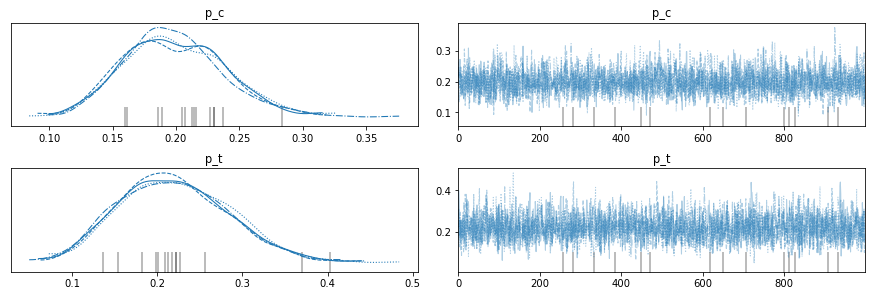

In [8]:
### BEGIN SOLUTION (do not delete this comment!)

#traceplot here
import arviz
arviz.plot_trace(samples_flips)

### END SOLUTION (do not delete this comment!)

In [9]:
### BEGIN SOLUTION (do not delete this comment!)

# summary here
arviz.summary(samples_flips, round_to=2)

### END SOLUTION (do not delete this comment!)

mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
p_c  0.20  0.04    0.13     0.27        0.0      0.0   3129.76   2586.05   
p_t  0.22  0.06    0.11     0.34        0.0      0.0   3343.23   2657.23   

     r_hat  
p_c    1.0  
p_t    1.0

**Answer the questions in the following cell: are the control and test groups' posterior distributions comparable? can we say that the initial external factor actually influeneces the results of our coin-flips?**

*BEGIN SOLUTION (do not delete this comment!)* 

Posterior distribution of control and test groups are comparable, we can't say that the initial external factor influences the results of coin-flips.

*END SOLUTION (do not delete this comment!)*

### Task 1.2 (1 pt.)

Now that you have understood the basic PyMC3 pipeline, let's try to model more complex data in a similar manner: 

1) load file sample_bml.csv - this file contains 1000 samples of some data with two labels '0' and '1' (the first column represents the labels).

2) plot the histograms of both groups of data in one figure 

3) analyze the resulting plot - write in the cell what type of data is in front of you and its characteristics

4) build the model 

    1) What are the types of distributions you would use for each of the presented group of data? 
    
    2) What about the parameters of these distributions? 
    
    3) What distribution is the resulting likelihood follows?
 
5) sample from the resulting model

6) plot the trace - use pymc3's `traceplot`

7) sample from the posterior predictive distribution of the model - use pymc3's `sample_posterior_predictive`

8) once again plot the histogram of the original data distribution and the resulting posterior predictive distribution

9) analyzing the results that you have achieved in 7) and 9), answer the questions: assess the success of your model - can it accurately approximate the original data distribution? how can you improve this model, if you want to achieve even better results?

1) load file sample_bml.csv 

In [10]:
### BEGIN SOLUTION (do not delete this comment!)

data = pd.read_csv('sample_bml.csv', header=None, sep=' ')
data[0] = data[0].astype(np.int)

### END SOLUTION (do not delete this comment!)

2) plot the histogramms of both groups of data in one figure

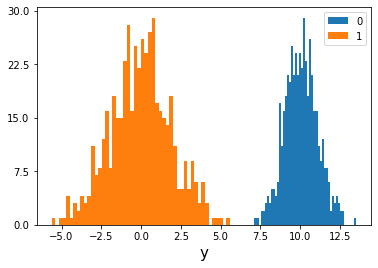

In [11]:
### BEGIN SOLUTION (do not delete this comment!)

fig = plt.figure(figsize=(6, 4))
plt.hist(data[data[0] == 0][1], label='0', bins=50)
plt.hist(data[data[0] == 1][1], label='1', bins=50)
plt.xticks(np.linspace(-5, 12.5, 8), fontsize=10)
plt.yticks(np.linspace(0, 30, 5), fontsize=10)
plt.xlabel('y', fontsize=15)
plt.legend(loc='upper right', fontsize=10)

### END SOLUTION (do not delete this comment!)

3) analyze the resulting plot - write in the cell what type of data is in front of you and its characteristics

*BEGIN SOLUTION (do not delete this comment!)*

There are 2 gaussian distributions: 0-label with mean 10 and variance $ (\frac{2.5}{3})^2$ and 1-label with mean 0 and variance $ (\frac{5}{3})^2$ 

*END SOLUTION (do not delete this comment!)*

4) build the model 

In [12]:
mixture_model = pm.Model()

with mixture_model:
  ### BEGIN SOLUTION (do not delete this comment!)

    w = pm.Dirichlet("w", np.ones(2))
    mu = pm.Normal("mu", np.array([10.0, 0.0]), np.array([1.0, 1.0]), shape=2)
    tau = pm.Gamma("tau", np.array([1 / (2.5/3), 1 / (5/3)]), np.array([1.0, 1.0]), shape=2)
    x_obs = pm.NormalMixture("x_obs", w, mu, tau=tau, observed=data[1])
    
  ### END SOLUTION (do not delete this comment!)

5) sample from the resulting model

In [13]:
with mixture_model:
    step = pm.NUTS()
    nuts_trace = pm.sample(2000, step)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [tau, mu, w]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 6 seconds.


6) plot the trace - use pymc3's traceplot

array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'w'}>,
        <AxesSubplot:title={'center':'w'}>],
       [<AxesSubplot:title={'center':'tau'}>,
        <AxesSubplot:title={'center':'tau'}>]], dtype=object)

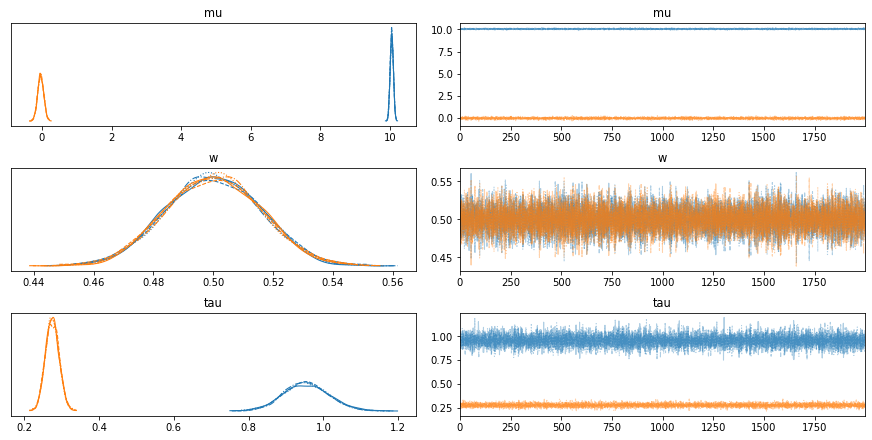

In [14]:
### BEGIN SOLUTION (do not delete this comment!)

arviz.plot_trace(nuts_trace)

### END SOLUTION (do not delete this comment!)

7) sample from the posterior predictive distribution of the model - use pymc3's sample_posterior_predictive



In [15]:
### BEGIN SOLUTION (do not delete this comment!)

with mixture_model:
    step = pm.NUTS()
    trace = pm.sample(2000, step)
    # sample posterior predictive samples
    ppc_trace = pm.sample_posterior_predictive(trace, var_names=["x_obs"])
    
### END SOLUTION (do not delete this comment!)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [tau, mu, w]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 6 seconds.


8) once again plot the histogram of the original data distribution and the resulting posterior predictive distribution

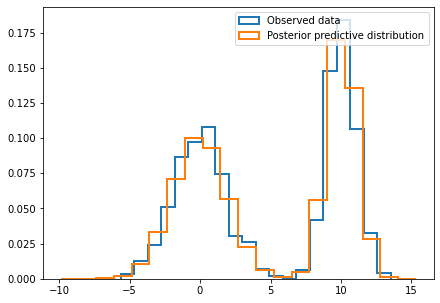

In [16]:
### BEGIN SOLUTION (do not delete this comment!)

fig = plt.figure(figsize=(7, 5))
plt.hist(data[1], histtype='step', linewidth=2, label='Observed data', bins=20, density=True)
plt.hist(ppc_trace['x_obs'].ravel(), histtype='step', linewidth=2, \
         label='Posterior predictive distribution', bins=20, density=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

### END SOLUTION (do not delete this comment!)

**Answer the questions: asses the success of you model - can it accurately approximate the original data distribution? how can you improve this model, if you want to achieve even better results?**

*BEGIN SOLUTION (do not delete this comment!)*

We can say that model accurately approximate data distribution; model can be improved if we take prior strongly concentrated around true distributions params(decrease variance for mu, tau).

*END SOLUTION (do not delete this comment!)*

## Task 2 - Gaussian Processes (1 pt.)

In the following exercise, you will need to fit the gaussian process with different kernels on the ```elecricity_consumption_FR.csv``` time series data. We have already loaded and prepared the train/test datasets for you below.

Use [**GPy**](https://pypi.python.org/pypi/GPy) library for training and prediction. Fit a GP and run the predict on the test. Useful kernels to combine: `GPy.kern.RBF, GPy.kern.Poly, GPy.kern.StdPeriodic, GPy.kern.White, GPy.kern.Linear`. 

**The task**:
* Normalize the target value by fitting a transformation on the train (use ```sklearn.preprocessing.StandardScaler```)
* Plot the resulting target against the time index.
* Plot mean and confidence interval of the prediction. 
* Inspect them on normality by scatter plot: plot predicted points/time series against true values. 
* Estimate the prediction error with `r2_score`. R2-score accepted > 0.7 on test sample.

In [17]:
! pip install GPy==1.9.9

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv('elecricity_consumption_FR.csv')

In [20]:
data.dropna(inplace=True)

In [21]:
y = np.array(data.values)
X = np.array(data.index)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)


Normalize the target value by fitting a transformation on the train (use sklearn.preprocessing.StandardScaler)

In [23]:
### BEGIN SOLUTION (do not delete this comment!)

scaler = StandardScaler()
scaler.fit(y_train)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)
y = scaler.transform(y)

### END SOLUTION (do not delete this comment!)

Plot the resulting target against the time index.

(array([-3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

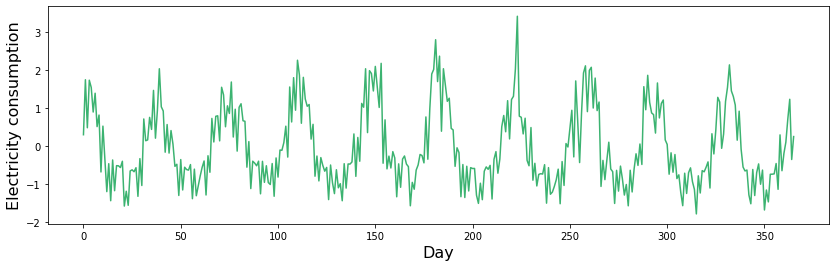

In [24]:
### BEGIN SOLUTION (do not delete this comment!)

fig = plt.figure(figsize=(14, 4))
plt.plot(y, c='mediumseagreen')
plt.xlabel('Day')
plt.ylabel('Electricity consumption')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

### END SOLUTION (do not delete this comment!)

Plot mean and confidence interval of the prediction.

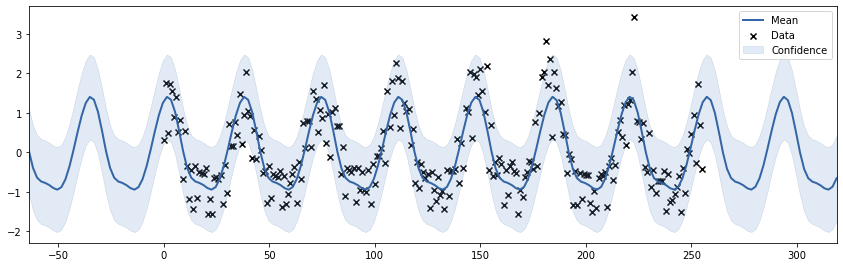

In [25]:
### BEGIN SOLUTION (do not delete this comment!)

import GPy

#variance = 1.
kernel = GPy.kern.StdPeriodic(1, period=50/np.pi*2)
model = GPy.models.GPRegression(X_train, y_train, kernel)
model.optimize()
model.plot(figsize=(12, 4))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

### END SOLUTION (do not delete this comment!)

Inspect them on normality by scatter plot: plot predicted points/time series against true values.

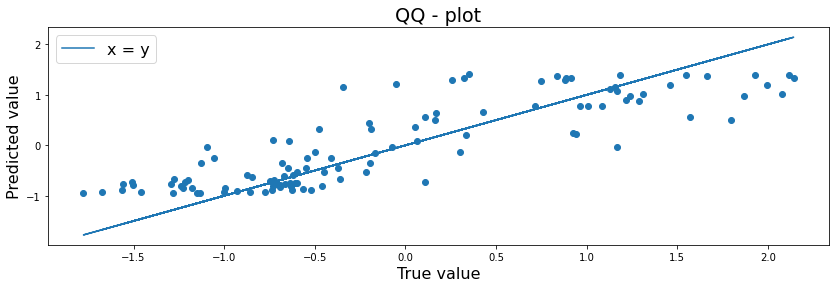

In [26]:
### BEGIN SOLUTION (do not delete this comment!)

fig = plt.figure(figsize=(14, 4))
y_test = y_test.squeeze()
y_pred = model.predict(X_test)[0].squeeze()
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, label='x = y')
plt.title('QQ - plot')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.xticks(np.linspace(-1.5, 2, 8), fontsize=10)
plt.yticks(np.linspace(-1, 2, 4), fontsize=10)
plt.legend()

### END SOLUTION (do not delete this comment!)

Estimate the prediction error with r2_score. R2-score accepted > 0.7 on test sample.

In [27]:
### BEGIN SOLUTION (do not delete this comment!)

from sklearn.metrics import r2_score

f'R2-score: {round(r2_score(y_test, y_pred), 3)}'

### END SOLUTION (do not delete this comment!)

'R2-score: 0.722'

## Task 3 - MNIST, kMNIST component analysis and manifold learning. (4 pts.)

### Task 3.1. (1 pt)

Download `MNIST` dataset. Here we will estimate the data intrinsic dimensionality, decompose the dataset on principle components and estimate the cumulative explained variance by each component.

You can either use the [proposed method](https://www.stat.berkeley.edu/~bickel/mldim.pdf) for the estimation of sample intrinsic dimension or any other method (convenient for you). For the first case, yoyu may use the code from [here](https://gist.github.com/mehdidc/8a0bb21a31c43b0cbbdd31d75929b5e4)

1. Estimate the intrinsic dimensionality of the dataset. Provide the plot.
2. Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with **6** different set of components and corresponding explained variance. You can choose any digit from the dataset.

In [28]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

dg = datasets.load_digits()

data = StandardScaler().fit_transform(dg.data)

1) Estimate the intrinsic dimentionality of the dataset. Provide the plot.

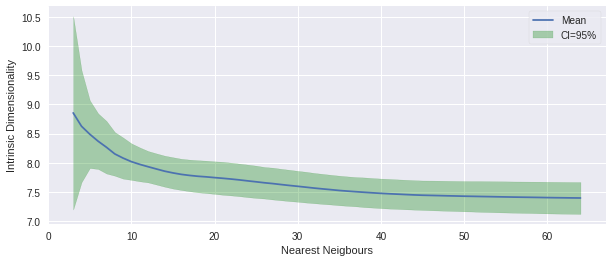

In [29]:
### BEGIN SOLUTION (do not delete this comment!)

from sklearn.neighbors import NearestNeighbors

def intrinsic_dim_sample_wise(X, k=5):
    neighb = NearestNeighbors(n_neighbors=k + 1).fit(X)
    dist, ind = neighb.kneighbors(X)
    dist = dist[:, 1:]
    dist = dist[:, 0:k]
    assert dist.shape == (X.shape[0], k)
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1])
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample

def intrinsic_dim_scale_interval(X, k1=10, k2=20):
    X = pd.DataFrame(X).drop_duplicates().values # remove duplicates in case you use bootstrapping
    intdim_k = []
    for k in range(k1, k2 + 1):
        m = intrinsic_dim_sample_wise(X, k).mean()
        intdim_k.append(m)
    return intdim_k

def repeated(func, X, nb_iter=100, random_state=None, verbose=0, mode='bootstrap', **func_kw):
    if random_state is None:
        rng = np.random
    else:
        rng = np.random.RandomState(random_state)
    nb_examples = X.shape[0]
    results = []

    iters = range(nb_iter)
    if verbose > 0:
        iters = tqdm(iters)    
    for i in iters:
        if mode == 'bootstrap':
            Xr = X[rng.randint(0, nb_examples, size=nb_examples)]
        elif mode == 'shuffle':
            ind = np.arange(nb_examples)
            rng.shuffle(ind)
            Xr = X[ind]
        elif mode == 'same':
            Xr = X
        else:
            raise ValueError('unknown mode : {}'.format(mode))
        results.append(func(Xr, **func_kw))
    return results

k1 = 3
k2 = 64
nb_iter = 200
intdim_k_repeated = repeated(intrinsic_dim_scale_interval, 
                             data, 
                             mode='bootstrap', 
                             nb_iter=nb_iter,
                             k1=k1, k2=k2)
intdim_k_repeated = np.array(intdim_k_repeated)

x = np.arange(k1, k2+1)

with plt.style.context('seaborn'):
    plt.figure(figsize=(10, 4))
    plt.plot(x, np.mean(intdim_k_repeated, axis=0), label='Mean')
    plt.fill_between(x, 
                     np.mean(intdim_k_repeated, axis=0) - 
                     2 * np.std(intdim_k_repeated, axis=0),
                     np.mean(intdim_k_repeated, axis=0) + 
                     2 * np.std(intdim_k_repeated, axis=0),
                     alpha=0.3,
                     label='CI=95%',
                     color='g')
    plt.xlabel("Nearest Neigbours")
    plt.ylabel("Intrinsic Dimensionality")
    plt.legend(frameon=True)
    plt.show()

### END SOLUTION (do not delete this comment!)

2) Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with 6 different set of components and corresponding explained variance. You can choose any digit from the dataset.

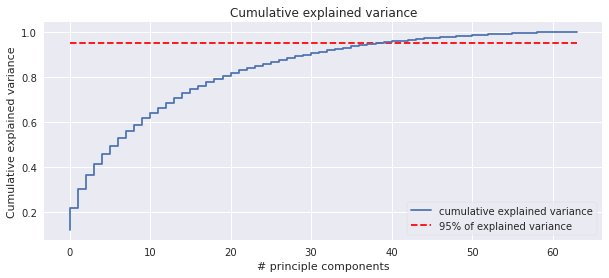

In [30]:
### BEGIN SOLUTION (do not delete this comment!)

from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(dg.data)

pca = PCA()
pca.fit(scaler.transform(dg.data))

with plt.style.context('seaborn'):
    plt.figure(figsize=(10, 4))
    plt.ylabel('Cumulative explained variance')
    plt.xlabel('# principle components')
    plt.title('Cumulative explained variance')
    plt.step(range(64), pca.explained_variance_ratio_.cumsum(), label='cumulative explained variance')
    plt.hlines(0.95, 0, 63, color='r', linestyle='--', label='95% of explained variance')
    plt.legend(loc='lower right', frameon=True)

### END SOLUTION (do not delete this comment!)

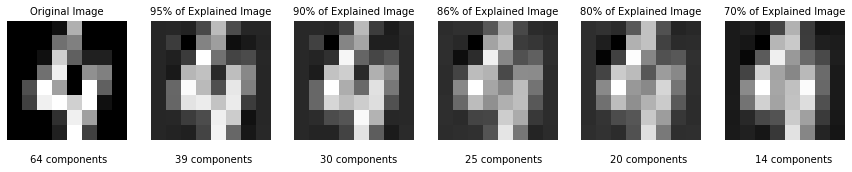

In [31]:
### BEGIN SOLUTION (do not delete this comment!)

from matplotlib import gridspec

explained_variance = np.array([95, 90, 86, 80, 70])
n_components = np.argmin(np.abs(100 * pca.explained_variance_ratio_.cumsum().reshape(1,-1).repeat(5, 0) \
                                - explained_variance[:, None]), axis=1)

gs = gridspec.GridSpec(1, 6)
sample = dg.data[4:5]

ax = plt.subplot(gs[0, 0])
ax.imshow(sample.reshape(8,8), cmap=plt.cm.gray)
ax.set_title('Original Image', fontsize=10)
ax.axis('off')
ax.text(1., 9, f'64 components', c='k', fontsize=10)

for i in range(1, 6):
    ax = plt.subplot(gs[0, i])
    transform = (scaler.transform(sample) - pca.mean_) @ pca.components_[:n_components[i-1]].T
    reconstruction = transform @ pca.components_[:n_components[i-1]] + pca.mean_
    ax.imshow(scaler.inverse_transform(reconstruction).reshape(8,8), cmap=plt.cm.gray)
    ax.set_title(f'{explained_variance[i-1]}% of Explained Image', fontsize=10)
    ax.axis('off')
    ax.text(i*0.1 + 1, 9, f'{n_components[i-1]} components', c='k', fontsize=10)

### END SOLUTION (do not delete this comment!)

### Task 3.2. (1 pt.)

Here we will visualize the decomposition in order to observe how data diverges across different manifold learning methods. We are to compare `PCA`, `ICA` and `Isomap` non-linear decompositions [see more over here https://scikit-learn.org/stable/modules/manifold.html], and check the classification accuracy on the new features. 

1. Calculate new features on the data with ICA, PCA and Isomap. **Choose the number of components according to your estimation of intrinsic dimension**. Calculate the classification accuracy on these features with `LogisticRegression` on `cross_val=5` with $3$ repeats. Use `RepeatedKFold` and fit the `random_seed = 42`.
2. Show that the `Isomap` gives a statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. Justify your results, write down 2-3 sentences.


In [32]:
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import Isomap

1) Calculate new features on the data with ICA, PCA and Isomap. Choose the number of components according to your estimation of intrinsic dimention. Calculate the classification accuracy on these features with LogisticRegression on cross_val=5 with  3  repeats. Use RepeatedKFold and fit the random_seed = 42.

In [33]:
### BEGIN SOLUTION (do not delete this comment!)

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

ica = FastICA(n_components=8)
pca = PCA(n_components=8)
isomap = Isomap(n_components=8)
logreg = LogisticRegression(random_state=12, n_jobs=-1)
methods = [ica, pca, isomap]
names = ['ICA', 'PCA', 'Isomap']

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
scores = {}

for name, method in zip(names, methods):
    pipe = make_pipeline(method, logreg)
    scores[name] = cross_val_score(pipe, data, dg.target, cv=cv, scoring='accuracy', n_jobs=-1)
    
print({key: round(val.mean(), 3) for key, val in scores.items()})

### END SOLUTION (do not delete this comment!)

{'ICA': 0.727, 'PCA': 0.871, 'Isomap': 0.948}


2) Show that the `Isomap` gives statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. 

In [34]:
### BEGIN SOLUTION (do not delete this comment!)

t_pca, pvalue_pca = stats.ttest_ind(scores['PCA'], scores['Isomap'], equal_var=False)
t_ica, pvalue_ica = stats.ttest_ind(scores['ICA'], scores['Isomap'], equal_var=False)
pvalue_pca, pvalue_ica = 1 - pvalue_pca / 2, 1 - pvalue_ica / 2
print(f"Got p-value for H0: acc_Isomap > acc_PCA = {pvalue_pca}")
print(f"Got p-value for H0: acc_Isomap > acc_ICA = {pvalue_ica}")

### END SOLUTION (do not delete this comment!)

Got p-value for H0: acc_Isomap > acc_PCA = 0.9999999999522163
Got p-value for H0: acc_Isomap > acc_ICA = 1.0


3) Justify your results, write down 2-3 senteces.

*BEGIN SOLUTION (do not delete this comment!)*

T-test show that Isomap methods performs better than ICA or PCA. These may be explained in such a way: PCA is "linear" method and because of that perform worse then Isomap; and ICA method perform not good may be because digits pictures not formated by sum of independent nongaussian components (these assumption more suitable for sound analysys, or MRI images etc.).

*END SOLUTION (do not delete this comment!)*

### Task 3.3. kMNIST dimensionality reduction. (2 pts.)

Explore `KMNIST` dataset https://github.com/rois-codh/kmnist. You are to engineer new features (by using any familiar to you method of Manifold Learning) to increase the classification accuracy. Use the `KNN` classifier with any hyperparameters you like.

1. __(2 pt.)__ Get accuracy on `test_set` more than 93%`. 

**NOTE** that the data is rather heavy, thus your decomposition will take a while.

__Hint:__ Try to use dimensionality reduction methods, which yield better model performance on `MNIST`. These methods can compete with Autoencoders on `torch`. 

1) Get accuracy on test_set more than 93%.

In [35]:
from sklearn.neighbors import KNeighborsClassifier

def load(f):
    return np.load(f)['arr_0']

# Load the data
x_train = load('kmnist-train-imgs.npz')
x_test = load('kmnist-test-imgs.npz')
y_train = load('kmnist-train-labels.npz')
y_test = load('kmnist-test-labels.npz')

# Reshape the data
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [36]:
### BEGIN SOLUTION (do not delete this comment!)

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV

pipe = Pipeline(steps=[
    ('pca', PCA(random_state=42)),
    ('knn', KNeighborsClassifier(weights='distance'))
])

param_grid = {
    'pca__n_components': np.array([30, 40, 50]),
    'knn__n_neighbors': np.array([3, 7]),
}

cv = KFold(n_splits=3, shuffle=True, random_state=42)
gs = GridSearchCV(pipe, param_grid=param_grid, cv=cv, 
                      scoring='accuracy', return_train_score=True)
gs.fit(x_train, y_train)
print(accuracy_score(y_test, gs.predict(x_test)))

### END SOLUTION (do not delete this comment!)

0.9367


## Task 4 - Clustering (2 pts.)

### Task 4.1. Explore KMeans and Gaussian Mixture algorithms (1 pt.)

Try **KMeans, Gaussian Mixture** and **two** more clustering algorithms from sklearn. 
To evaluate clustering performance use **two** clustering metrics: *silhouette score*
and *mutual information* or *adjusted mutual information*.

For each algorithm **your task** is to try to find the parameters leading to the best performance for `n_clusters=true_number_of_clusters`:
1. Apply the algorithm with the true number of clusters and try out at least two **other variants** of the number of clusters: a smaller and a larger one than the true number.;
2. For each number of clusters **visualize the clustering result**, calculate the **clustering metrics** and plot them;

__NOTE:__ `sklearn.model_selection.GridSearchCV` does not support clustering methods, thus you suppose to do it manually.

In [37]:
import numpy as np

True number of clusters is 15


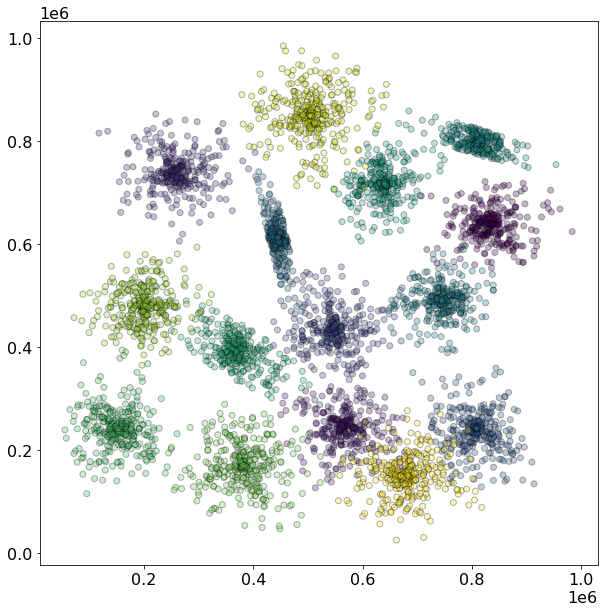

In [38]:
points, labels = np.loadtxt('clustering.txt'), np.loadtxt('clustering_labels.txt')
labels = labels.astype(int)
print("True number of clusters is {}".format(np.max(labels)))
plt.figure(figsize=(10, 10))
plt.scatter(points[:,0], points[:,1], c=labels, alpha=0.3, edgecolor='k')

plt.show()

In [39]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, mutual_info_score
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

1) Apply the algorithm with the true number of clusters and try out at least two other variants of the number of clusters: a smaller and a larger one than the true number.;

 Do not forget that despite the plot picturing just the KMeans and GuassianMizture, you will need to ADDITIONALLY try put and plot two other clustering methods. 

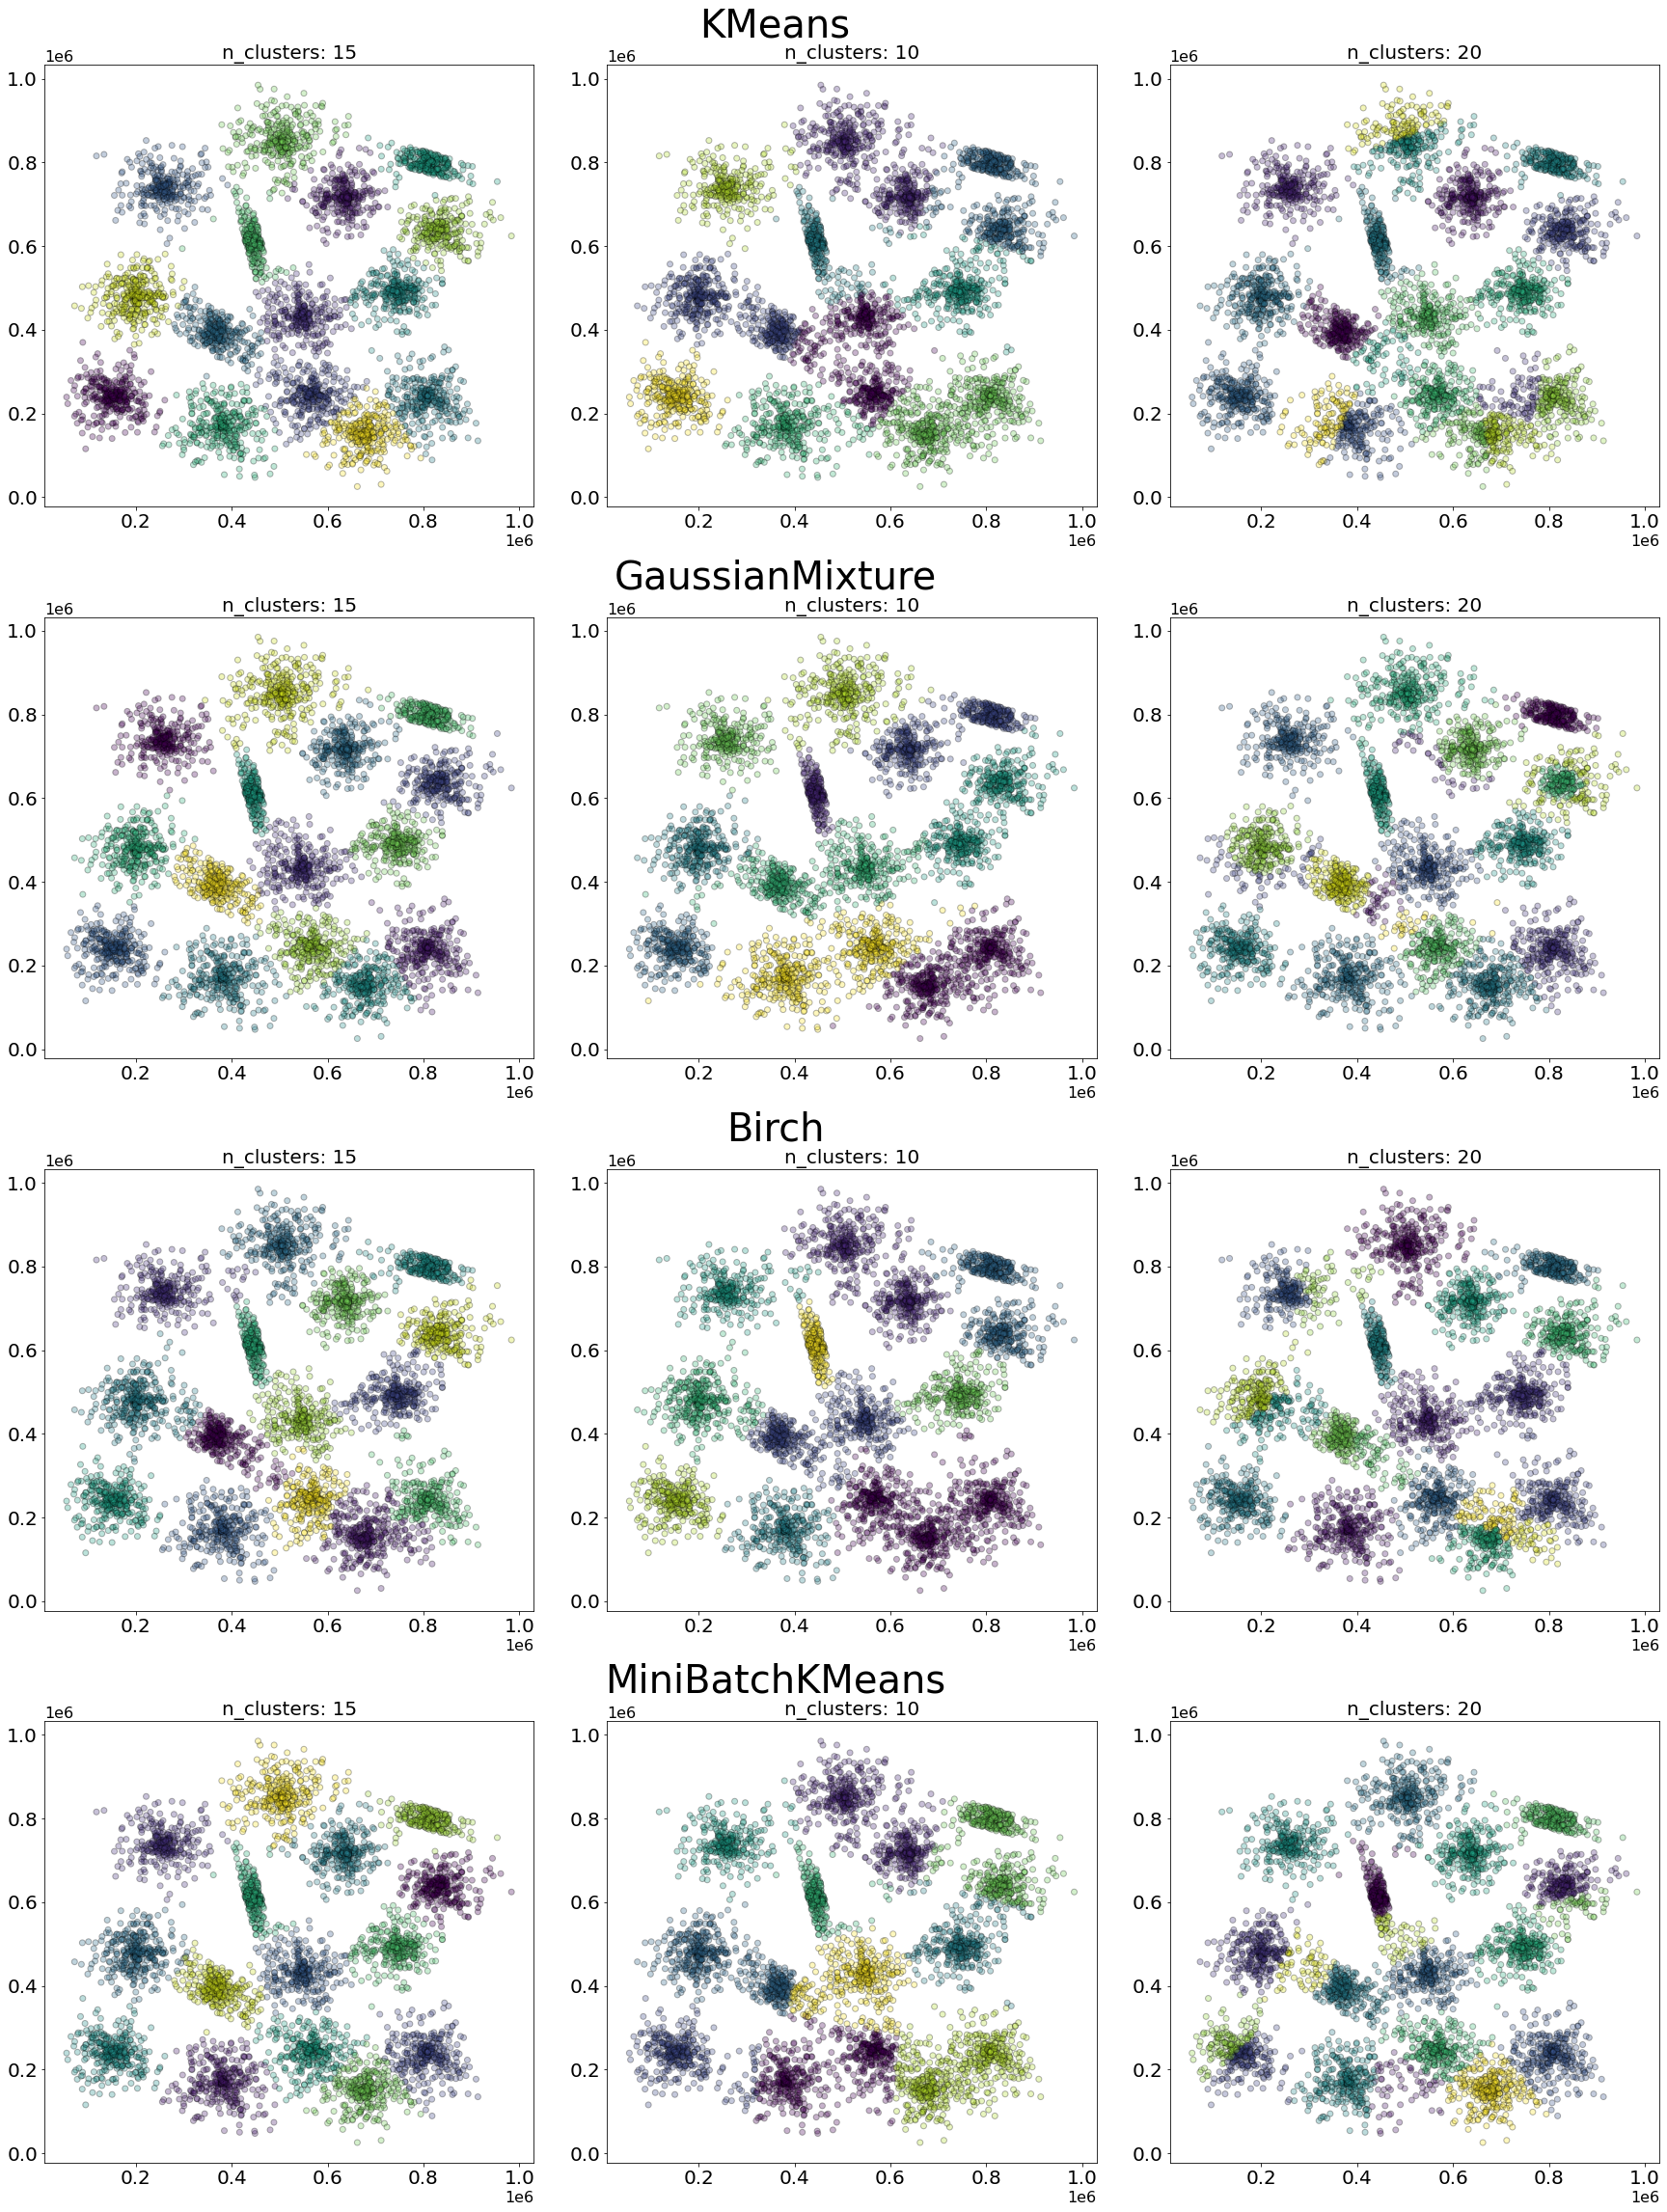

In [40]:
## BEGIN SOLUTION (do not delete this comment!)
  
from sklearn.cluster import Birch, MiniBatchKMeans
from sklearn.model_selection import KFold
from itertools import product


def GridSearchCVCustom(clst, X, params_grid, score_metric, cv):
    best_score = -np.inf
    init_params = clst.get_params()
    params_combinations = product(*list(params_grid.values()))
    param_names = list(params_grid.keys())
    
    for param_comb in params_combinations:
        params = dict(zip(param_names, param_comb))
        joint_params = {**init_params, **params}
        scores = np.zeros(cv.n_splits)
        
        for i, (train_index, val_index) in enumerate(cv.split(X)):
            clst = method(**joint_params)
            clst.fit(X[train_index])
            y_pred = clst.predict(X[val_index])
            scores[i] = score_metric(X[val_index], y_pred)
            
        score = scores.mean()
        if score > best_score:
            best_score = score
            best_params = params
        
    return best_params


methods = [KMeans, GaussianMixture, Birch, MiniBatchKMeans]
kmeans_grid = {'tol': [1e-4, 1e-3], 'max_iter':[300, 1000]}
gauss_mix_grid = {'tol': [1e-4, 1e-3]} 
birch_grid = {'threshold' : [0.1, 0.5], 'branching_factor': [50, 100]}
mini_kmeans_grid = {'batch_size': [100, 200], 'max_iter': [100, 400]}
params_grids = [kmeans_grid, gauss_mix_grid, birch_grid, mini_kmeans_grid]
best_params = []

n_clusters = np.array([15, 10, 20])
cv = KFold(n_splits=5, shuffle=True, random_state=30)

gs = gridspec.GridSpec(4, 3, figure=plt.figure(figsize=(30, 40)))
gs.update(wspace=0.15, hspace=0.25)


for i, (method, param_grid) in enumerate(zip(methods, params_grids)):
    
    if method is GaussianMixture:
        params = GridSearchCVCustom(method(n_components=15, random_state=42), \
                                points, param_grid, silhouette_score, cv)
    else:
        params = GridSearchCVCustom(method(n_clusters=15), \
                                points, param_grid, silhouette_score, cv)
    best_params.append(params)
    
    for j, n in enumerate(n_clusters):
        if method is GaussianMixture:
            labels = method(n_components=n, **params).fit_predict(points)
        else:
            labels = method(n_clusters=n, **params).fit_predict(points)
        ax = plt.subplot(gs[i, j])
        ax.scatter(points[:, 0], points[:, 1], c=labels, alpha=0.3, edgecolor='k')
        ax.set_title(f'n_clusters: {n}', fontsize=20)
        for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
        for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
                
        if j == 1:
            ax.text(1e6 * 0.36, 1e6 * 1.1, f'{method.__name__}', fontsize=40, c='k', horizontalalignment='center')
    
### END SOLUTION (do not delete this comment!)

2) For each number of clusters vizualize the clustering result, calculate the clustering metrics and plot them;


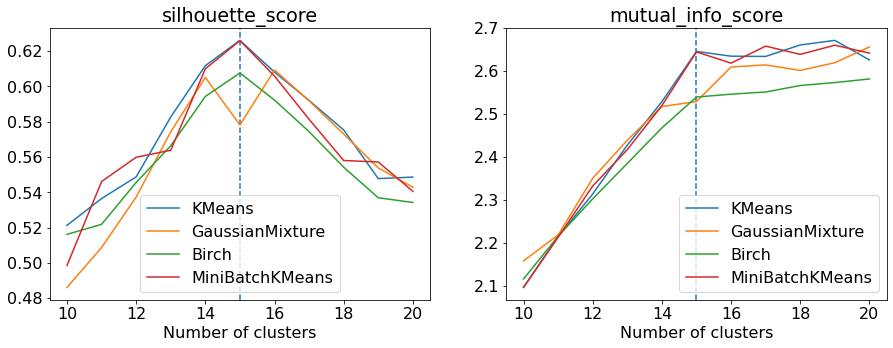

In [41]:
### BEGIN SOLUTION (do not delete this comment!)

n_clusters = list(range(10, 21))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].set_title('silhouette_score')
ax[1].set_title('mutual_info_score')
ax[0].set_xlabel('Number of clusters')
ax[1].set_xlabel('Number of clusters')
ax[0].axvline(15, linestyle='--')
ax[1].axvline(15, linestyle='--')

for params, method in zip(best_params, methods):
    sil_score, mut_score = [], []
    for n in n_clusters:
        if method is GaussianMixture:
            predict = method(n_components=n, **params).fit_predict(points)
        else:
            predict = method(n_clusters=n, **params).fit_predict(points)
        sil_score.append(silhouette_score(points, predict))
        mut_score.append(mutual_info_score(labels, predict))
        
    ax[0].plot(n_clusters, sil_score, label=f'{method.__name__}')
    ax[1].plot(n_clusters, mut_score, label=f'{method.__name__}')

ax[0].legend()
ax[1].legend()

### END SOLUTION (do not delete this comment!)

### Task 4.2. Finding the Number of Clusters with Bootstrap. (1 pt.)
For a chosen algorithm find the best number of clusters using bootstrap. Based on your observations made at the previous task, choose one algorithm assuming **you do not have true labels and do not know the true number of clusters**.
1. Estimate variance of the clustering metric of your choice (i.e. *silhouette score*/*mutual information*/*adjusted mutual information*)and construct normal 95% **confidence interval (CI)**;
2. **Plot the metric** with the corresponding confidence intervals and show the best number of clusters.

__Hints:__ 
- you can choose bootstrap samples with any size, and sample number starting from `50`;
- you can use `scipy.stats.norm.interval()` to derive CI;

1) Estimate variance of the clustering metric of your choice (i.e. silhouette score/mutual information/adjusted mutual information)and construct normal 95% confidence interval (CI);

In [42]:
### BEGIN SOLUTION (do not delete this comment!)

z1, z2 = stats.norm.interval(0.95)
estimation, lower_bound, upper_bound = [], [], []
N = points.shape[0]
n_iter = 50

method, best_params = methods[0], best_params[0]

for n in n_clusters:
    sil_score = np.zeros(n_iter)
    for m in range(n_iter):
        ids = np.random.choice(N, size=N)
        predict = method(n_clusters=n, **best_params).fit_predict(points[ids])
        sil_score[m] = silhouette_score(points[ids], predict)
        
    mean, std = sil_score.mean(), sil_score.std()
    estimation.append(mean)
    low, up = mean + z1 * std, mean + z2 * std
    lower_bound.append(low)
    upper_bound.append(up)

    print(f'Number of clusters: {n}\n\tVariance: {std**2}\n\tConfidence interval: {low, up}')
    
### END SOLUTION (do not delete this comment!)

Number of clusters: 10
	Variance: 4.209489766723071e-05
	Confidence interval: (0.5066622520011297, 0.5320949723393082)
Number of clusters: 11
	Variance: 5.349304091241717e-05
	Confidence interval: (0.5212166467510345, 0.5498865831903611)
Number of clusters: 12
	Variance: 3.104879063044017e-05
	Confidence interval: (0.5501345989008607, 0.5719770026732655)
Number of clusters: 13
	Variance: 1.9354143094313225e-05
	Confidence interval: (0.5756282413242839, 0.5928733152535688)
Number of clusters: 14
	Variance: 1.2251469620048238e-05
	Confidence interval: (0.6056730190219308, 0.6193935898611342)
Number of clusters: 15
	Variance: 1.6074587125385902e-05
	Confidence interval: (0.6188674330904902, 0.6345836494928982)
Number of clusters: 16
	Variance: 1.742908626885071e-05
	Confidence interval: (0.6030383607782409, 0.6194033376720977)
Number of clusters: 17
	Variance: 3.047213562562268e-05
	Confidence interval: (0.5835655419911991, 0.6052041606332876)
Number of clusters: 18
	Variance: 6.980861940

2) Plot the metric with the corresponding confidence intervals and show the best number of clusters.

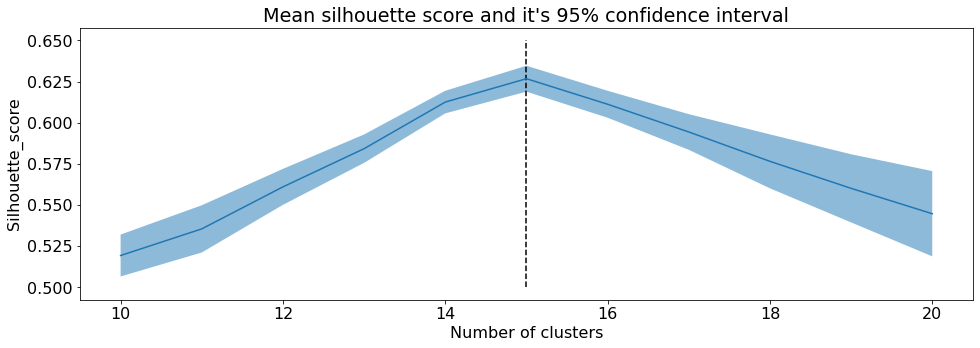

In [43]:
### BEGIN SOLUTION (do not delete this comment!)

fig = plt.figure(figsize=(16, 5))
plt.plot(n_clusters, estimation)
plt.fill_between(n_clusters, lower_bound, upper_bound, alpha=0.5)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette_score')
plt.title("Mean silhouette score and it's 95% confidence interval")
plt.vlines(n_clusters[np.argmax(np.array(estimation))], 0.5, 0.65, color='k', linestyle='--')

### END SOLUTION (do not delete this comment!)

## Task 5. Practice with Different Anomaly Detection Algorithms. (2 pts)

### Task 5.1 (1 pt)

- Here we will use __fraud_dataset__ (creditcard.csv )
- Compute the __contamination__ (or impurity) on the training set as the ratio of anomaly objects to all the objects.  
- Predict the anomaly with any **three** Anomaly detection methods among ones from: https://scikit-learn.org/stable/modules/outlier_detection.html, note, we do not use true labels to fit anomaly detectors.
- Explore, how the `roc_auc_score` for anomaly detectors changes with `contamination` value, taking a grid `[0.1*contamination, 1*contamination, 10*contamination]`. Point out the best performing algorithm.

In [44]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score

data = pd.read_csv('./creditcard.csv')

X = data.drop(columns="Class")
y = data["Class"]

# keep the split fixed
tt_split = train_test_split(X, y, test_size = 0.1, stratify=y, random_state= 42)
train_X, test_X, train_y, test_y = tt_split 

# delete the targets for training
train_y = 0

In [45]:
### BEGIN SOLUTION (do not delete this comment!)
  
# impurity estimation on test data

contamination = (test_y == 1).sum() / test_y.size

### END SOLUTION (do not delete this comment!)

In [46]:
### BEGIN SOLUTION (do not delete this comment!)

from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor


methods = [LocalOutlierFactor, IsolationForest, EllipticEnvelope]

for i in [0.1, 1, 10]:

    for method in methods:
        if method is LocalOutlierFactor:
            detector = method(contamination=contamination * i, novelty=True)
        else:
            detector = method(contamination=contamination * i)
        detector.fit(train_X)
        pred_y = 0.5 * (1 - detector.predict(test_X))
        
 
        print(method.__name__, ': Contamination: ', np.round(contamination * i, 3), ' ', 
              'ROC/AUC: ', np.round(roc_auc_score(test_y, pred_y), 3),
              'Precision: ', np.round(precision_score(test_y, pred_y, average = 'micro'), 3))

        # roc_auc increases with contamination increasing;
        # IsolationForest algorithm performs better on precision and roc_auc metrics
        # then LocalOutlierFactor and EllipticEnvelope methods
        
### END SOLUTION (do not delete this comment!)

LocalOutlierFactor : Contamination:  0.002   ROC/AUC:  0.499 Precision:  0.981
IsolationForest : Contamination:  0.002   ROC/AUC:  0.51 Precision:  0.983
EllipticEnvelope : Contamination:  0.002   ROC/AUC:  0.5 Precision:  0.982
LocalOutlierFactor : Contamination:  0.017   ROC/AUC:  0.5 Precision:  0.963
IsolationForest : Contamination:  0.017   ROC/AUC:  0.742 Precision:  0.985
EllipticEnvelope : Contamination:  0.017   ROC/AUC:  0.619 Precision:  0.98
LocalOutlierFactor : Contamination:  0.169   ROC/AUC:  0.506 Precision:  0.817
IsolationForest : Contamination:  0.169   ROC/AUC:  0.871 Precision:  0.845
EllipticEnvelope : Contamination:  0.169   ROC/AUC:  0.778 Precision:  0.84


### Task 5.2 (1 pt)

The idea is to see when anomaly detection methods, trained with no labels, can facilitate the prediction of the classifier. Imagine a real case scenario: you have labelled only a small portion of the dataset and a bunch of unlabeled data. We will simulate the situation when __90%__ of data is unlabeled and we still desire to achieve good performance. 


As you can score your predictions only on the __10%__ of the sample, you better do it in cross validation to ensure the model stability.
1. Take your favorite classifier and estimate the performance on __test set__ using `StratifiedKFold(n_splits=10, random_state = 42)` with `roc_auc` and `precision_score`. You can use test set upsampling and other instruments to enforce your prediction. 

> Do not get confused, here we swap __train__ and __test__ and use __test__ as if it's the only data we have on our hands.

2. Try to enhance the classifier performance in  `roc_auc` or `precision_score` (or ideally both), building the ensemble, using __Anomaly detection__ methods from the previous task. You can fit __Anomaly detection__ methods on both  __training set__ and subset from __test set__ on the cross-validation fold. Write 1-2 sentences on your findings.

__NOTE:__ try not to overfit, thus not adjust the `contamination` while training, and refit classifiers on each fold. 

__Hints:__ `sklearn.ensemble.VotingClassifier` does not support Anomaly detection methods, so you are to write it yourself. And `np.logical_and` or `np.logical_or` will suit for the trivial ensemble.

In [47]:
### BEGIN SOLUTION (do not delete this comment!)

# your favorite classifier

from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
skf.get_n_splits(test_X, test_y)

roc_auc_scores = []
pr_score = []

for train_index, test_index in skf.split(test_X, test_y):

    model.fit(test_X.iloc[train_index], test_y.iloc[train_index])
    pred_y = model.predict(test_X.iloc[test_index])
    proba_pred_y = model.predict_proba(test_X.iloc[test_index])[:, 1]
    roc_auc_scores.append(roc_auc_score(test_y.iloc[test_index], proba_pred_y))
    pr_score.append(precision_score(test_y.iloc[test_index], pred_y))
    
    
### END SOLUTION (do not delete this comment!)

print('ROC/AUC mean: ', np.mean(roc_auc_scores), 'std: ', np.std(roc_auc_scores))    
print('Precision mean: ', np.mean(pr_score), 'std: ', np.std(pr_score))

ROC/AUC mean:  0.9238065233506301 std:  0.11705241513891507
Precision mean:  0.8371428571428572 std:  0.2141142170879451


In [48]:
### BEGIN SOLUTION (do not delete this comment!)

# ensemble of classifiers
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
skf.get_n_splits(test_X, test_y)

roc_auc_scores = []
pr_score = []

for train_index, test_index in skf.split(test_X, test_y):

    model.fit(test_X.iloc[train_index], test_y.iloc[train_index])
    
    detector = IsolationForest(contamination=contamination)
    detector.fit(np.concatenate((train_X, test_X.iloc[train_index]), axis=0))
    detector_pred = 0.5 * (1 - detector.predict(test_X.iloc[test_index]))
    
    model_pred = model.predict(test_X.iloc[test_index])
    model_pred_proba = model.predict_proba(test_X.iloc[test_index])[:, 1]
    
    pred_y = np.logical_and(detector_pred, model_pred)
    
    roc_auc_scores.append(roc_auc_score(test_y.iloc[test_index], (detector_pred + model_pred_proba) / 2))
    pr_score.append(precision_score(test_y.iloc[test_index], pred_y))
    
### END SOLUTION (do not delete this comment!)
    
print('ROC/AUC mean: ', np.mean(roc_auc_scores), 'std: ', np.std(roc_auc_scores))    
print('Precision mean: ', np.mean(pr_score), 'std: ', np.std(pr_score))

ROC/AUC mean:  0.9518554484803559 std:  0.07138978170194285
Precision mean:  1.0 std:  0.0
